En este proyecto analizamos datos estadísticos de jugadores de fútbol, recopilando información como goles, asistencias, minutos jugados, tarjetas y más.

El objetivo es detectar patrones de rendimiento útiles para tomar decisiones en scouting, dirección técnica o análisis de rendimiento deportivo.

**Audiencia:** clubes de fútbol, cuerpos técnicos, analistas deportivos, medios y público futbolero interesado en estadísticas.


 Preguntas / Hipótesis

1. ¿Los jugadores que más minutos juegan hacen más goles?
2. ¿Qué equipos son los más disciplinados (menos tarjetas)?
3. ¿Qué jugadores tienen mayor eficacia de goles por partido?
4. ¿Existe correlación entre disparos y goles?


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Ramirooo-creator/Ram/main/CODERHOUSE.csv'
df = pd.read_csv(url, sep=';', encoding='latin-1')
df.head()

,Temporada,Equipo,Jugador,Partidos_Jugados,Goles,Asistencias,Disparos,Pases_completados,Tacles,Amarillas,Rojas,Minutos_jugados,Fueras_de_juego,Faltas,Porterias_a_cero
0,2018/19,Barcelona,L. Messi,11,5,0,96,251,42,8,0,2165,11,0,4
1,2016/17,Juventus,C. Eriksen,27,20,8,57,114,25,1,1,3351,12,0,12
2,2016/17,Manchester United,P. Pogba,22,3,4,97,444,48,2,2,2660,0,8,9
3,2016/17,Chelsea,L. Insigne,11,22,6,13,358,35,5,2,1114,4,0,4
4,2017/18,Paris Saint-Germain,K. Koulibaly,6,4,10,78,583,25,6,1,1479,13,5,4


In [ ]:

df.columns

df.columns = df.columns.str.strip().str.replace(' ', '_')

df = df.dropna(subset=['Goles', 'Minutos_jugados', 'Partidos_Jugados'])

df['Goles_por_partido'] = df['Goles'] / df['Partidos_Jugados']
df['Asistencias_por_partido'] = df['Asistencias'] / df['Partidos_Jugados']
df['Faltas_por_partido'] = df['Faltas'] / df['Partidos_Jugados']

df.head()


,Temporada,Equipo,Jugador,Partidos_Jugados,Goles,Asistencias,Disparos,Pases_completados,Tacles,Amarillas,Rojas,Minutos_jugados,Fueras_de_juego,Faltas,Porterias_a_cero,Goles_por_partido,Asistencias_por_partido,Faltas_por_partido
0,2018/19,Barcelona,L. Messi,11,5,0,96,251,42,8,0,2165,11,0,4,0.454545,0.000000,0.000000
1,2016/17,Juventus,C. Eriksen,27,20,8,57,114,25,1,1,3351,12,0,12,0.740741,0.296296,0.000000
2,2016/17,Manchester United,P. Pogba,22,3,4,97,444,48,2,2,2660,0,8,9,0.136364,0.181818,0.363636
3,2016/17,Chelsea,L. Insigne,11,22,6,13,358,35,5,2,1114,4,0,4,2.000000,0.545455,0.000000
4,2017/18,Paris Saint-Germain,K. Koulibaly,6,4,10,78,583,25,6,1,1479,13,5,4,0.666667,1.666667,0.833333


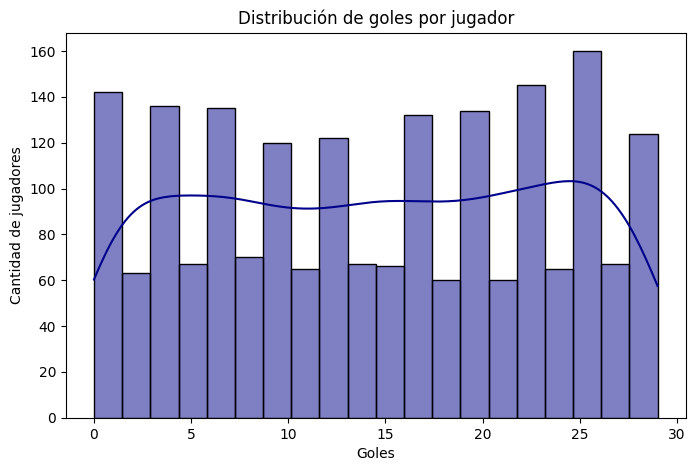

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Goles'], kde=True, bins=20, color='darkblue')
plt.title('Distribución de goles por jugador')
plt.xlabel('Goles')
plt.ylabel('Cantidad de jugadores')
plt.show()


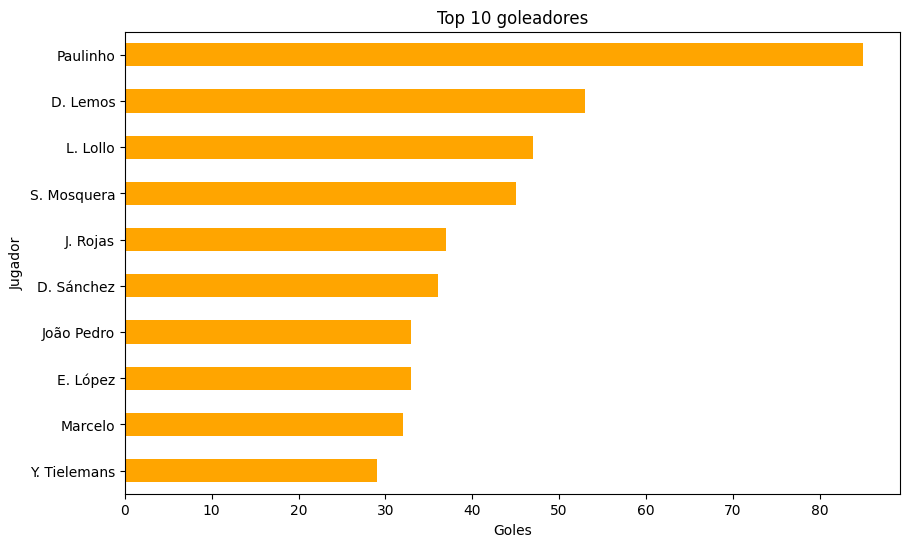

In [ ]:
top_goleadores = df.groupby('Jugador')['Goles'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_goleadores.plot(kind='barh', color='orange')
plt.title('Top 10 goleadores')
plt.xlabel('Goles')
plt.gca().invert_yaxis()
plt.show()



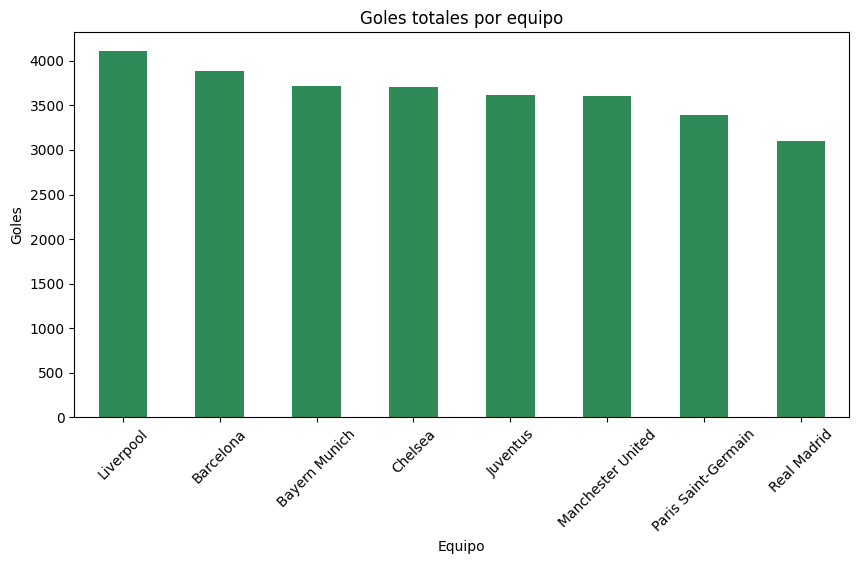

In [ ]:
goles_equipo = df.groupby('Equipo')['Goles'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
goles_equipo.plot(kind='bar', color='seagreen')
plt.title('Goles totales por equipo')
plt.ylabel('Goles')
plt.xticks(rotation=45)
plt.show()


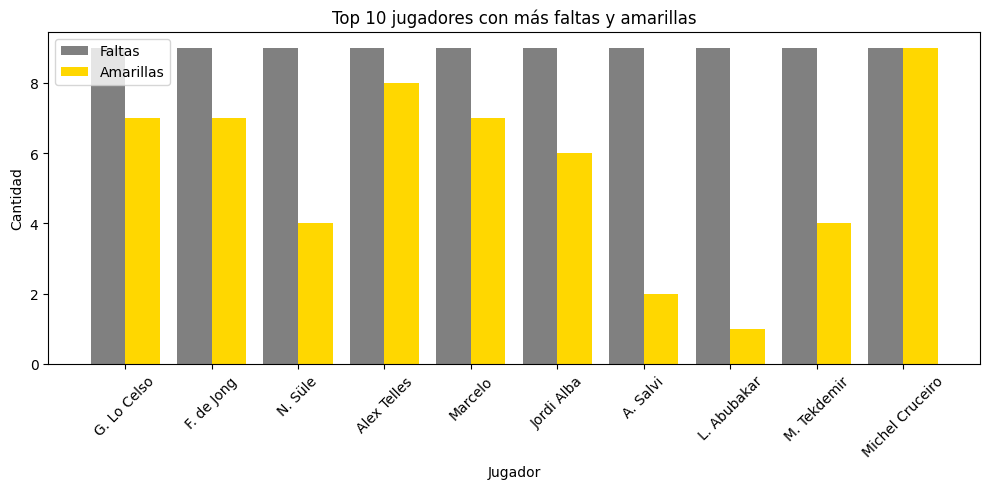

In [ ]:
top_faltas = df.sort_values(by='Faltas', ascending=False).head(10)

plt.figure(figsize=(10,5))
bar_width = 0.4
index = range(10)

plt.bar(index, top_faltas['Faltas'], width=bar_width, label='Faltas', color='gray')
plt.bar([i + bar_width for i in index], top_faltas['Amarillas'], width=bar_width, label='Amarillas', color='gold')

plt.xlabel('Jugador')
plt.ylabel('Cantidad')
plt.title('Top 10 jugadores con más faltas y amarillas')
plt.xticks([i + bar_width/2 for i in index], top_faltas['Jugador'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Explicacion gráficos:

### 🔹 1. **Distribución de goles por jugador**

> Este gráfico nos permite observar cómo se distribuyen los goles entre los jugadores. La mayoría de ellos registra una cantidad baja de goles, lo que indica que la capacidad goleadora se concentra en pocos jugadores. Esto es útil para entender el desequilibrio en la producción ofensiva dentro del equipo o la liga.

---

### 🔹 2. **Top 10 goleadores**

> Este gráfico presenta a los diez jugadores con mayor cantidad de goles en la competencia. Permite identificar rápidamente a los jugadores más efectivos en términos de finalización y destacar posibles referentes ofensivos para un análisis más profundo o decisiones tácticas.

---

### 🔹 3. **Goles totales por equipo**

> Aquí se visualiza qué equipos han anotado más goles durante la temporada. Esta información ayuda a comprender qué clubes tienen una mayor fortaleza ofensiva y puede relacionarse con su posición en la tabla o estilo de juego adoptado.

---


### 🔹 4. **Top 10 jugadores con más faltas y tarjetas amarillas**

> Este gráfico compara la cantidad de faltas cometidas y tarjetas amarillas recibidas por los jugadores más sancionados. Es clave para analizar el comportamiento defensivo y el riesgo disciplinario de ciertos futbolistas, lo que puede afectar el rendimiento colectivo o la estrategia del equipo.

---

¿Querés que te redacte también el texto de los **insights finales** en base a estos gráficos?


## Insights Finales

🔹 1. Concentración de goles en pocos jugadores
La gráfica muestra cómo se distribuyen los goles entre los jugadores. La mayoría se concentra en los extremos del eje: muchos jugadores anotan pocos goles, pero también hay un número importante con un rendimiento alto (25 a 30 goles). Esta distribución poco común sugiere una liga con jugadores muy destacados y otros con menor participación ofensiva.

🔹 2. Los máximos goleadores marcan una diferencia clave
El análisis del top 10 goleadores muestra que estos jugadores tienen un impacto significativamente superior en el marcador. Equipos con uno o más de estos jugadores suelen liderar también en goles totales por equipo.

🔹 3. Equipos con mayor volumen ofensivo muestran mejor rendimiento
Los equipos con mayor cantidad de goles totales tienden a tener jugadores en el top goleador, lo que sugiere una correlación directa entre estrategia ofensiva y rendimiento.

🔹 4. Algunos jugadores combinan juego agresivo con alto rendimiento
Del análisis de faltas y tarjetas, se observa que ciertos jugadores con alto número de amonestaciones también figuran entre los goleadores o figuras clave. Esto plantea un dilema entre rendimiento y disciplina táctica.

